In [1]:
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Célula de imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from scipy.stats import norm , probplot, boxcox

from sklearn.model_selection import learning_curve, train_test_split, cross_val_score, validation_curve
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [34]:
def curva_aprendizado(estimador, X, y, cv=None):
    plt.figure()
    plt.title("Curva de Aprendizado")
    plt.xlabel('Pontos do treinamento')
    plt.ylabel('Desempenho')
    plt.grid()
    
    pontos, desempenho_in, desempenho_out = learning_curve(estimador, X, y, train_sizes=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], cv=cv)
    
    media_in = np.mean(desempenho_in, axis=1)
    desvio_in = np.std(desempenho_in, axis=1)
    media_out = np.mean(desempenho_out, axis=1)
    desvio_out = np.std(desempenho_out, axis=1)
    
    
    plt.plot(pontos, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(pontos, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(pontos, media_in - desvio_in, media_in + desvio_in, color='red', alpha=0.2)
    plt.fill_between(pontos, media_out - desvio_out, media_out + desvio_out, color='green', alpha=0.2)
    
    
    plt.legend()
    
    return plt

In [42]:
def curva_validacao(estimador, X, y, p, p_range, cv=None):
    plt.figure()
    plt.title("Curva de Validação")
    plt.xlabel('Parâmetro')
    plt.ylabel('Desempenho')
    plt.xscale('log')
    plt.grid()
    
    desempenho_in, desempenho_out = validation_curve(estimador, X, y, p, p_range, cv=cv)
    
    media_in = np.mean(desempenho_in, axis=1)
    desvio_in = np.std(desempenho_in, axis=1)
    media_out = np.mean(desempenho_out, axis=1)
    desvio_out = np.std(desempenho_out, axis=1)
    
    
    plt.plot(p_range, media_in, 'o-', color='red', label='Treinamento')
    plt.plot(p_range, media_out, 'o-', color='green', label='Teste')
    
    plt.fill_between(p_range, media_in - desvio_in, media_in + desvio_in, color='red', alpha=0.2)
    plt.fill_between(p_range, media_out - desvio_out, media_out + desvio_out, color='green', alpha=0.2)
    
    
    plt.legend()
    
    return plt

In [4]:
dados = pd.read_csv('HousePrices.csv')
dados.shape

(1460, 81)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
dados.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1198,1199,20,RL,70.0,9100,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,178000
409,410,60,FV,85.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,New,Partial,339750
196,197,20,RL,79.0,9416,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2007,New,Partial,311872
659,660,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,WD,Normal,167000
503,504,20,RL,100.0,15602,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,3,2010,WD,Normal,289000


In [7]:
copia = dados.copy()
dados.drop('Id', axis=1, inplace=True)

In [8]:
matriz = dados.corr()

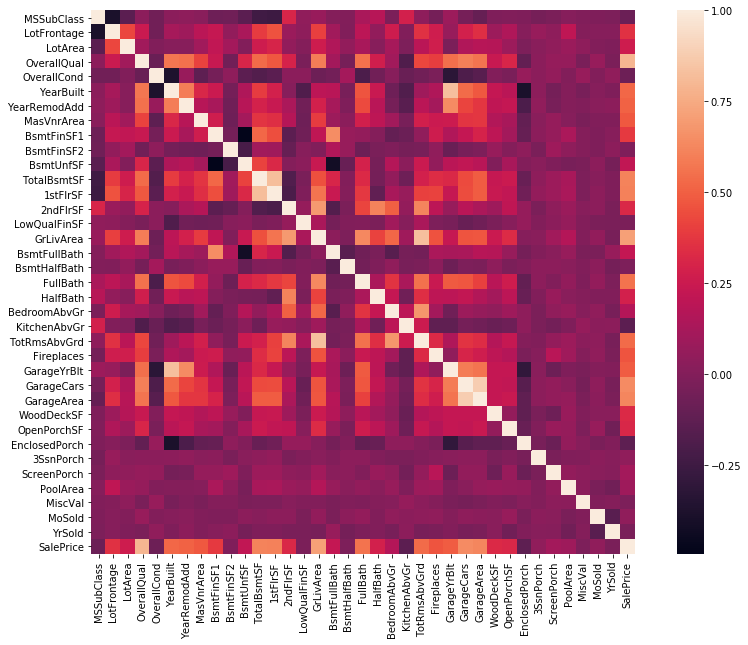

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(matriz, square=True)

In [10]:
maior_correl = matriz.index[abs(matriz['SalePrice']) > 0.5]

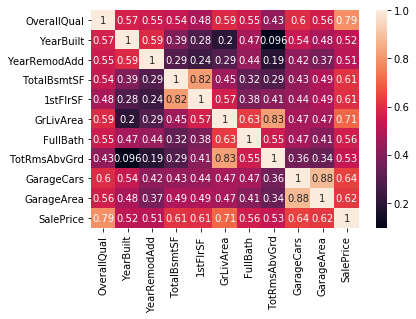

In [11]:
sns.heatmap(dados[maior_correl].corr(), annot=True)

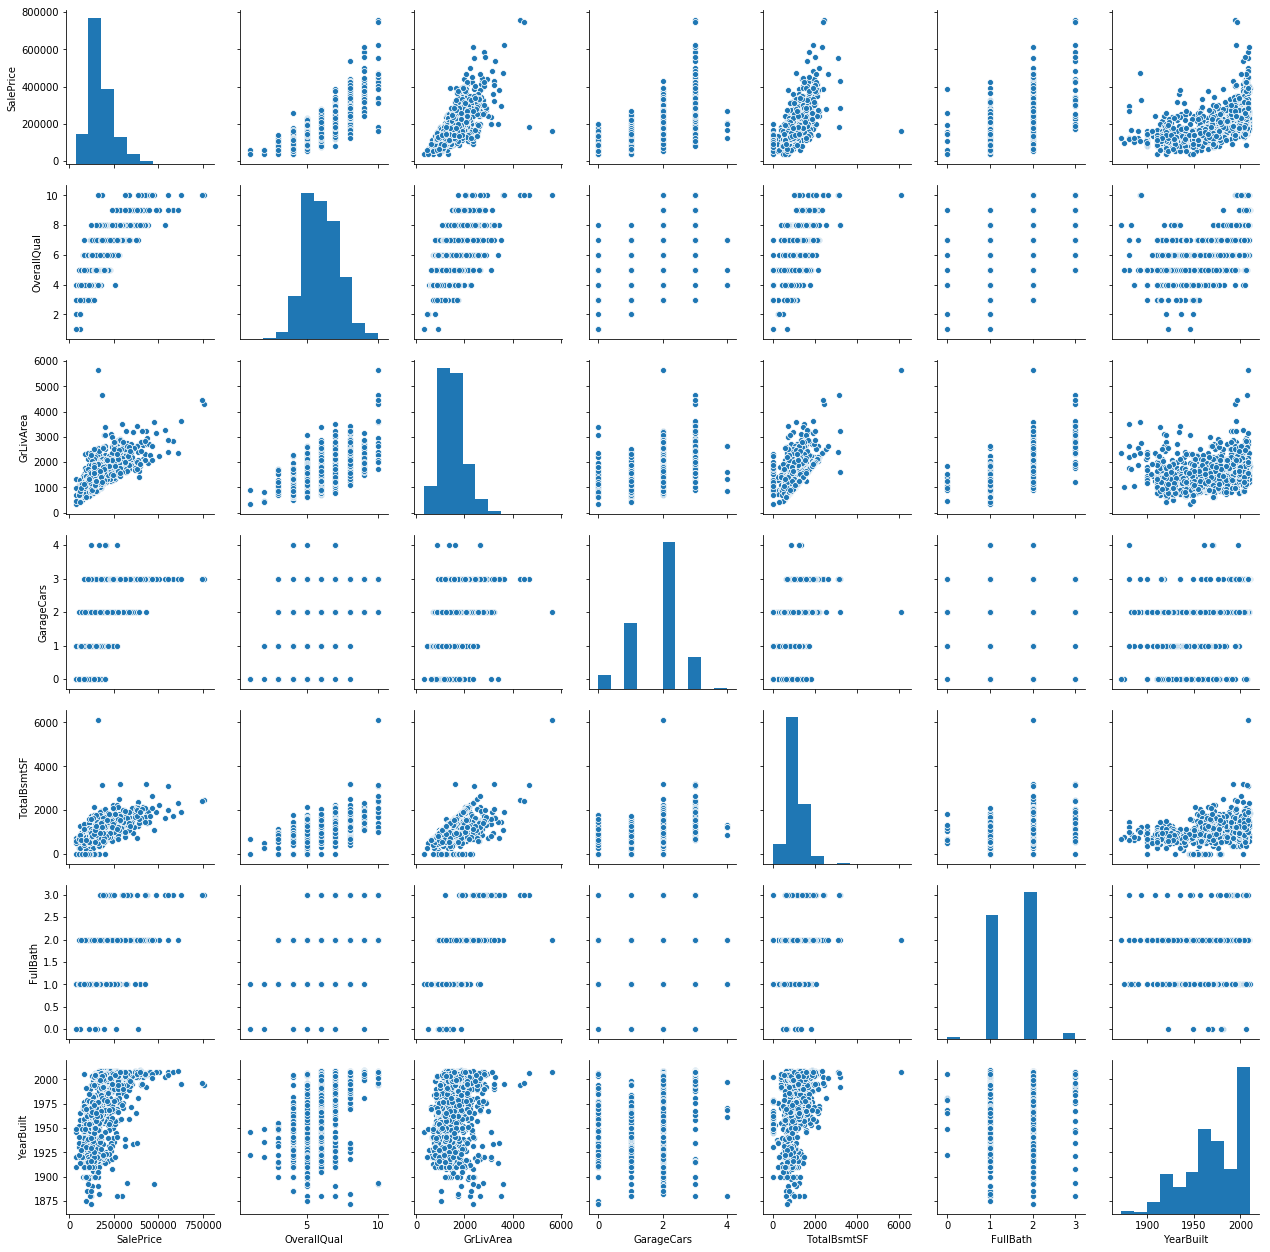

In [12]:
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(dados[col])

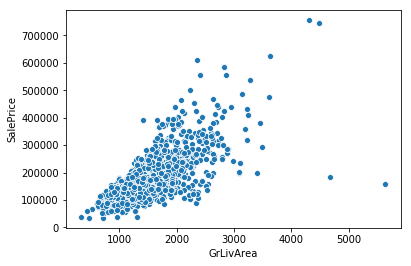

In [13]:
sns.scatterplot(x=dados['GrLivArea'], y=dados['SalePrice'])

In [14]:
dados.drop(dados[(dados['GrLivArea'] > 4000) & (dados['SalePrice'] < 300000)].index, inplace=True)

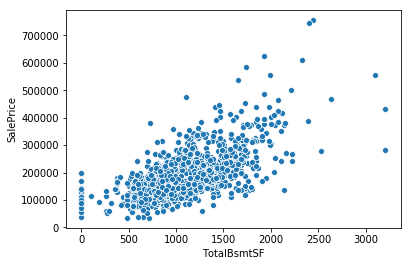

In [15]:
sns.scatterplot(x=dados['TotalBsmtSF'], y=dados['SalePrice'])

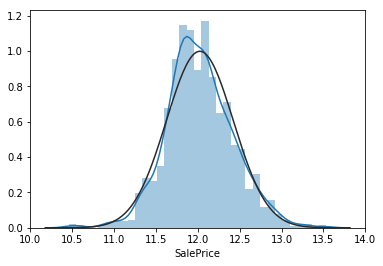

In [52]:
sns.distplot(dados['SalePrice'], fit=norm)

In [50]:
(m, d) = norm.fit(dados['SalePrice'])
print(f'Media {m} com desvio {d}')

Media 12.024015155682552 com desvio 0.3995757283645756


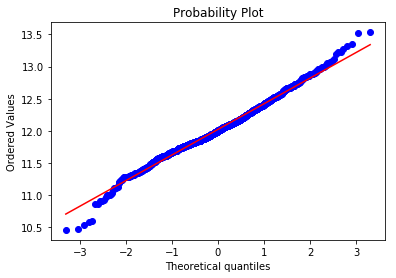

In [51]:
plt.figure()
probplot(dados['SalePrice'], plot=plt)
plt.show()

In [19]:
dados['SalePrice'] = np.log1p(dados['SalePrice'])

In [20]:
dados.isnull().sum().sort_values(ascending=False)

PoolQC           1452
MiscFeature      1404
Alley            1367
Fence            1177
FireplaceQu       690
LotFrontage       259
GarageType         81
GarageCond         81
GarageFinish       81
GarageQual         81
GarageYrBlt        81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
RoofMatl            0
Exterior1st         0
RoofStyle           0
ExterQual           0
Exterior2nd         0
YearBuilt           0
ExterCond           0
Foundation          0
YearRemodAdd        0
SalePrice           0
OverallCond         0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

In [21]:
f_cat = dados.select_dtypes(include=['object']).columns
f_num = dados.select_dtypes(exclude=['object']).columns
f_num = f_num.drop('SalePrice')

In [22]:
dados_cat = dados[f_cat]
dados_num = dados[f_num]

dados_cat.fillna('Ausente', inplace=True)
dados_num.fillna(0, inplace=True)

In [23]:
for col in dados_num:
    dados_num[col] = boxcox(dados_num[col] + 1)[0]

In [24]:
X = pd.concat([dados_cat, dados_num], axis=1)
y = dados['SalePrice']

In [25]:
X = pd.get_dummies(X)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [68]:
def rmse(modelo, X, y):
    return np.sqrt(- cross_val_score(modelo, X, y, scoring='neg_mean_squared_error', cv=10))

def rmse_test(modelo, X, y):
    p = modelo.predict(X)
    erros = []
    erro = 0
    
    for valor in range(0, len(p)):
        erros.append(np.square(p[valor] - y[valor]))
        
    return [np.sqrt(np.mean(erros)), np.sqrt(np.std(erros))]

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

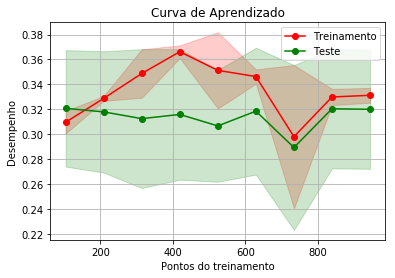

In [36]:
reg_lin = LinearRegression()
curva_aprendizado(reg_lin, X_train, y_train, cv=10)

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

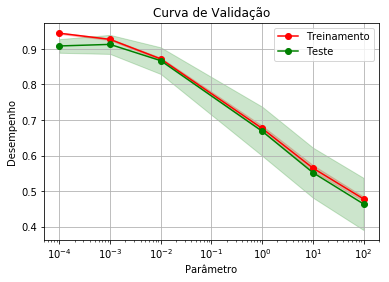

In [43]:
lasso = Lasso()
curva_validacao(lasso, X_train, y_train, 'alpha', [0.0001, 0.001, 0.01, 1, 10, 100], cv=10)

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

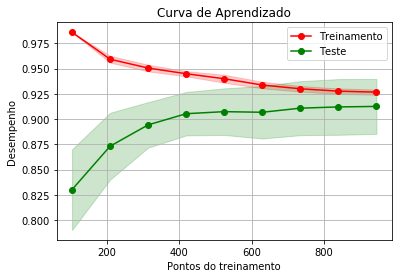

In [45]:
lasso = Lasso(alpha=0.001)
curva_aprendizado(lasso, X_train, y_train, cv=10)

In [49]:
score = rmse(lasso, X_train, y_train)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.11640881309535447 com desvio 0.021772975751464516


In [53]:
score = rmse(lasso, X_test, y_test)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.12404611732984379 com desvio 0.03413046629360642


In [54]:
ponto_teste = X.loc[X.index == 509]
pontos_treinamento = X.loc[X.index != 509]
res_teste = y.loc[y.index == 509]
y_treinamento = y.loc[y.index != 509]

In [55]:
lasso.fit(pontos_treinamento, y_treinamento)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
predicao = lasso.predict(ponto_teste)
print(f'O valor predito é {np.expm1(predicao[0])} valor real {np.expm1(res_teste)}')

O valor predito é 135852.30031823873 valor real 509    124500.0
Name: SalePrice, dtype: float64


<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

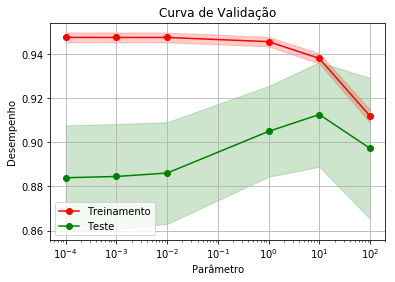

In [59]:
ridge = Ridge()
curva_validacao(ridge, X_train, y_train, 'alpha', [0.0001, 0.001, 0.01, 1, 10, 100], cv=10)

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

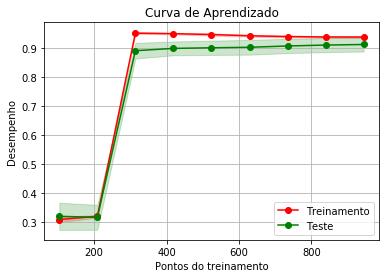

In [61]:
ridge = Ridge(alpha=10)
curva_aprendizado(ridge, X_train, y_train, cv=10)

In [62]:
score = rmse(ridge, X_train, y_train)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.11651351332205151 com desvio 0.019102007800371325


In [69]:
score = rmse_test(ridge, X_test, y_test.values)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.14403742599474928 com desvio 0.037213288537000316


In [70]:
ridge.fit(pontos_treinamento, y_treinamento)
predicao = ridge.predict(ponto_teste)
print(f'O valor predito é {np.expm1(predicao[0])} valor real {np.expm1(res_teste)}')

O valor predito é 142735.27632484058 valor real 509    124500.0
Name: SalePrice, dtype: float64


<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

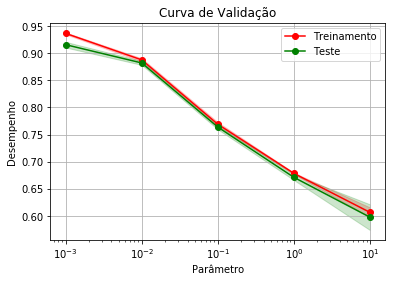

In [72]:
enet = ElasticNet(l1_ratio=0.6)
curva_validacao(enet, X_train, y_train, 'alpha', [0.001, 0.01, 0.1, 1, 10])

<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

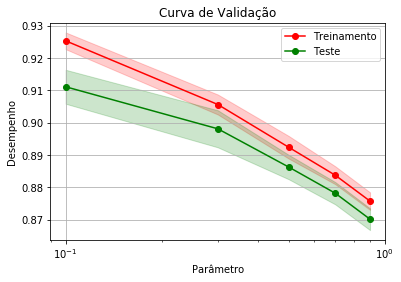

In [77]:
enet = ElasticNet(alpha=0.01)
curva_validacao(enet, X_train, y_train, 'l1_ratio', [0.1, 0.3, 0.5, 0.7, 0.9])


<module 'matplotlib.pyplot' from '/home/usuario/Allan-manha/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

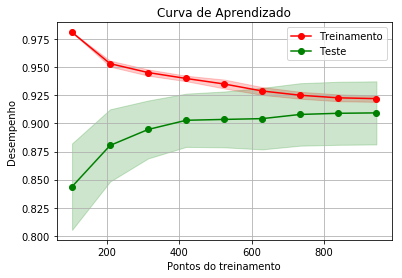

In [78]:
enet = ElasticNet(alpha=0.01, l1_ratio=0.1)
curva_aprendizado(enet, X_train, y_train, cv=10)

In [79]:
score = rmse(enet, X_train, y_train)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.11839392114009353 com desvio 0.0221229388273417


In [81]:
enet.fit(X_train, y_train)
score = rmse_test(enet, X_test, y_test.values)
print(f'Erro de {np.mean(score)} com desvio {np.std(score)}')

Erro de 0.15870239503819678 com desvio 0.04676053933034634


In [82]:
predicao = enet.predict(ponto_teste)
print(f'O valor predito é {np.expm1(predicao[0])} valor real {np.expm1(res_teste)}')

O valor predito é 134399.74362680793 valor real 509    124500.0
Name: SalePrice, dtype: float64


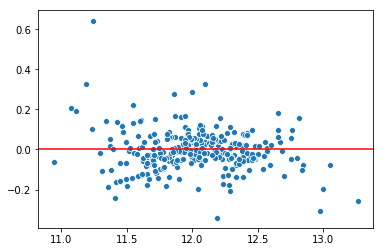

In [86]:
predicts = lasso.predict(X_test)
plt.figure()
plt.axhline(color='red')
sns.scatterplot(predicts, predicts - y_test.values)